In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [31]:
site = "A"

In [59]:
# load the data
data_directory = ""
data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316230 entries, 0 to 316229
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ts                             316230 non-null  object 
 1   instanceID                     316230 non-null  object 
 2   AoARel                         283709 non-null  float64
 3   bladePitch                     310401 non-null  float64
 4   bladePitchMax                  310401 non-null  float64
 5   bladePitchMin                  310401 non-null  float64
 6   bladePitchSetPoint             0 non-null       float64
 7   bladePitchStd                  0 non-null       float64
 8   cP                             294271 non-null  float64
 9   generatorTorque                294275 non-null  float64
 10  rotorTorque                    286475 non-null  float64
 11  TI                             0 non-null       float64
 12  TSR                           

In [61]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316230 entries, 0 to 316229
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ts          316230 non-null  object
 1   instanceID  316230 non-null  object
 2   value       316230 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ MB


In [93]:
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

6
['A_WTG01' 'A_WTG02' 'A_WTG03' 'A_WTG04' 'A_WTG05' 'A_WTG06']


**Comment:** data size: 1316230 x 26; flag size: 1316230 x 3. There are 6 turbines. 366 x 6 x 24 x 6 + 6 = 1316230. No missing rows.

In [63]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [64]:
# Add month and day
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [65]:
data.columns.values

array(['ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [66]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 'TI', 
                'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [75]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
112432,2020-05-10 03:00:00,5,10,3,A_WTG05,9.912486,1.465838,NaN,5.701473,1955.0930,1
300327,2020-12-13 14:20:00,12,13,14,A_WTG04,9.965893,1.515829,NaN,4.500536,1843.2800,1
223353,2020-09-15 12:10:00,9,15,12,A_WTG04,2.309416,0.435312,NaN,23.557030,0.0000,0
140169,2020-06-11 05:30:00,6,11,5,A_WTG04,7.589588,1.255373,NaN,8.912985,905.4008,1
208477,2020-08-29 07:00:00,8,29,7,A_WTG02,12.319210,1.742872,NaN,8.813930,2450.2410,1


### Calculate TI

In [76]:
data['TI'] = (data['Wind_speed_sd']/data['Wind_speed'])*100

In [77]:
data.head()

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
0,2020-01-01,1,1,0,A_WTG01,3.625675,0.256472,7.073759,1.643807,61.43359,1
1,2020-01-01,1,1,0,A_WTG02,3.641454,0.538374,14.784600,1.917134,83.51791,1
2,2020-01-01,1,1,0,A_WTG03,4.438631,NaN,NaN,1.945568,112.47560,1
3,2020-01-01,1,1,0,A_WTG04,5.191913,0.536756,10.338318,1.985323,170.29570,1
4,2020-01-01,1,1,0,A_WTG05,2.956308,0.758379,25.652919,2.291515,0.00000,0


### Plot time series

In [78]:
data_01 = data[data['instanceID'] == site + '_WTG01']

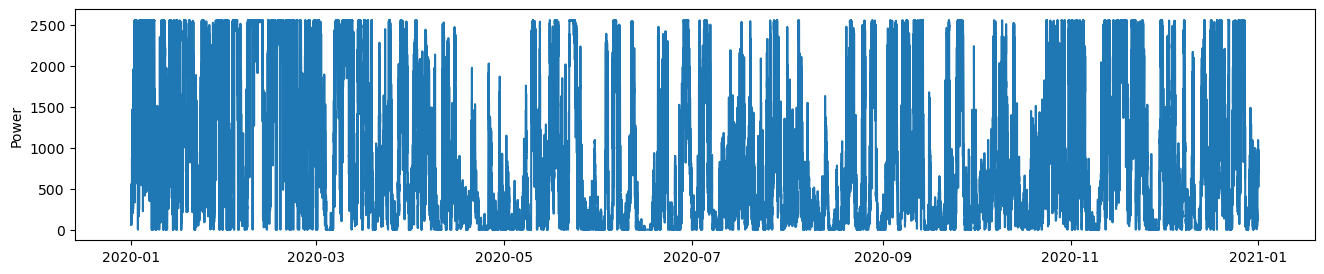

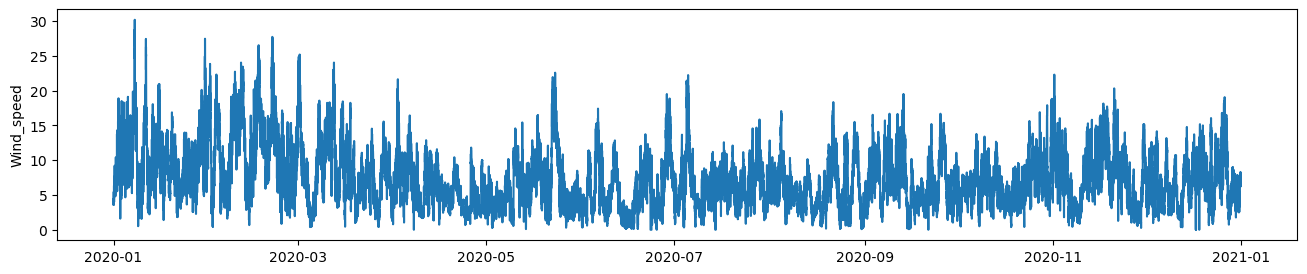

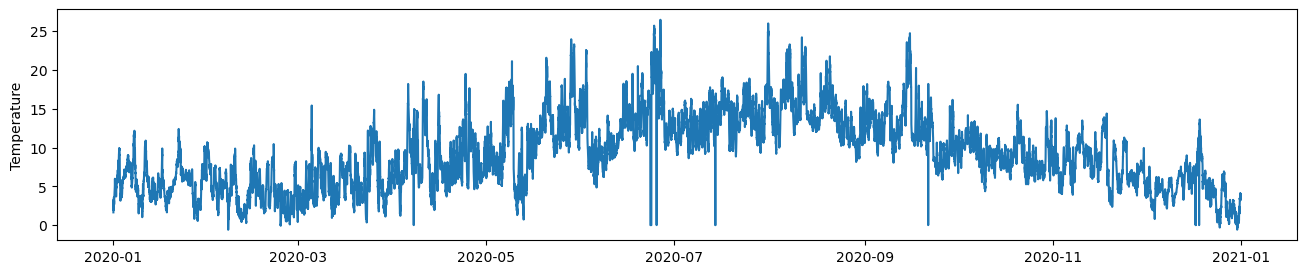

In [81]:
fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Power'])
ax.set_ylabel('Power')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Wind_speed'])
ax.set_ylabel('Wind_speed')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Temperature'])
ax.set_ylabel('Temperature')
plt.show()

### Full performance data

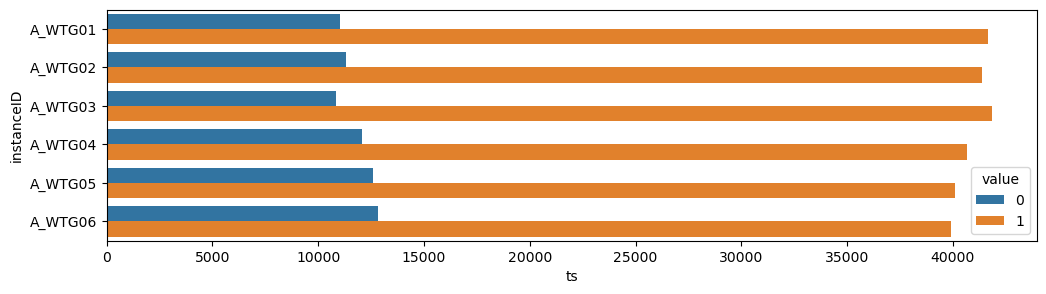

In [82]:
# Plot bar chart of performance flag for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
fig, ax = plt.subplots(figsize = (12,3))
ax = sns.barplot(x="ts", y="instanceID", hue = "value", data=bar, orient = "h")

plt.show()

In [83]:
# only select rows with flag value = 1
data_clean = data[data['value'] == 1]

# drop irrelevant columns 
data_clean = data_clean.drop(columns = ['value'])

In [84]:
data_clean.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power
count,245616.000000,245616.000000,245616.000000,245616.000000,244026.000000,244026.000000,245616.000000,245616.000000
mean,6.166431,15.643260,11.523883,7.692640,1.188774,16.250991,8.981322,978.460794
std,3.446068,8.940323,6.906587,3.717346,0.562620,5.021199,4.568631,871.883310
min,1.000000,1.000000,0.000000,1.791111,0.129635,3.717963,-0.702608,2.505268
25%,3.000000,8.000000,6.000000,4.941311,0.782420,12.768122,5.431331,237.245350
50%,6.000000,16.000000,12.000000,6.866902,1.059378,15.263644,8.535692,640.837250
75%,9.000000,23.000000,17.000000,9.657703,1.477164,18.851405,12.220815,1677.320250
max,12.000000,31.000000,23.000000,24.967040,4.992694,56.552833,26.720890,2570.237000


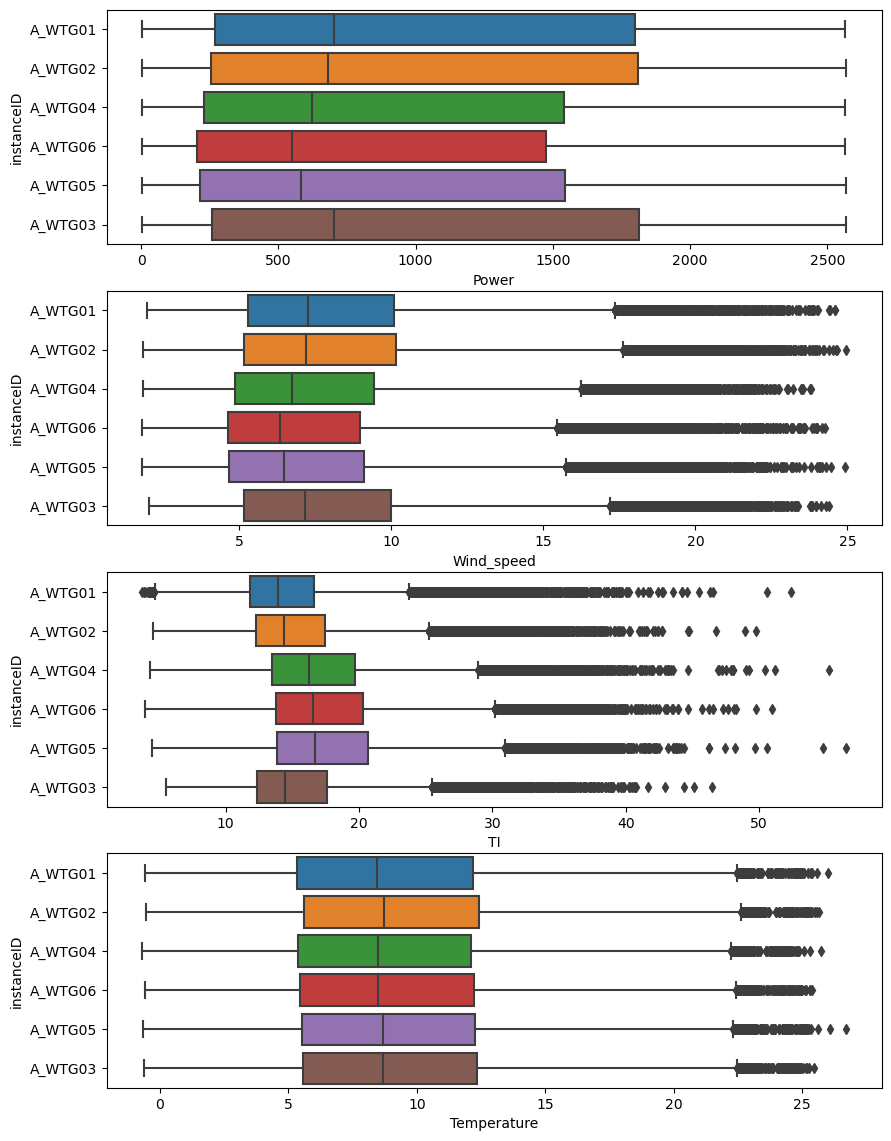

In [113]:
# Make boxplot
fig, ax = plt.subplots(4, figsize = (10,14))

features = [ 'Power','Wind_speed', 'TI', 'Temperature']

for i in range (0,4):
    sns.boxplot(x = features[i], y = 'instanceID', data = data_clean, orient = 'h', ax = ax[i])
    ax[i].set(xlabel = features[i], ylabel = 'instanceID')

plt.show()

In [90]:
# Find null entries in the data
print(data_clean.isnull().sum())
null = data_clean[data_clean.isna().any(axis=1)]
null

ts                  0
Month               0
Day                 0
Hour                0
instanceID          0
Wind_speed          0
Wind_speed_sd    1590
TI               1590
Temperature         0
Power               0
dtype: int64


,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
2,2020-01-01 00:00:00,1,1,0,A_WTG03,4.438631,NaN,NaN,1.945568,112.47560
8,2020-01-01 00:10:00,1,1,0,A_WTG03,4.490916,NaN,NaN,1.958168,150.60820
14,2020-01-01 00:20:00,1,1,0,A_WTG03,4.312759,NaN,NaN,1.868798,147.49050
20,2020-01-01 00:30:00,1,1,0,A_WTG03,4.083557,NaN,NaN,2.085873,130.84780
26,2020-01-01 00:40:00,1,1,0,A_WTG03,2.908692,NaN,NaN,2.428943,39.97645
...,...,...,...,...,...,...,...,...,...,...
69956,2020-03-21 23:10:00,3,21,23,A_WTG03,7.130938,NaN,NaN,3.086167,812.28230
69962,2020-03-21 23:20:00,3,21,23,A_WTG03,7.110927,NaN,NaN,3.099273,780.86800
69968,2020-03-21 23:30:00,3,21,23,A_WTG03,7.270631,NaN,NaN,3.098351,832.75960
69974,2020-03-21 23:40:00,3,21,23,A_WTG03,7.246546,NaN,NaN,3.097124,828.15520


In [91]:
# drop null entries
data_clean = data_clean.dropna()

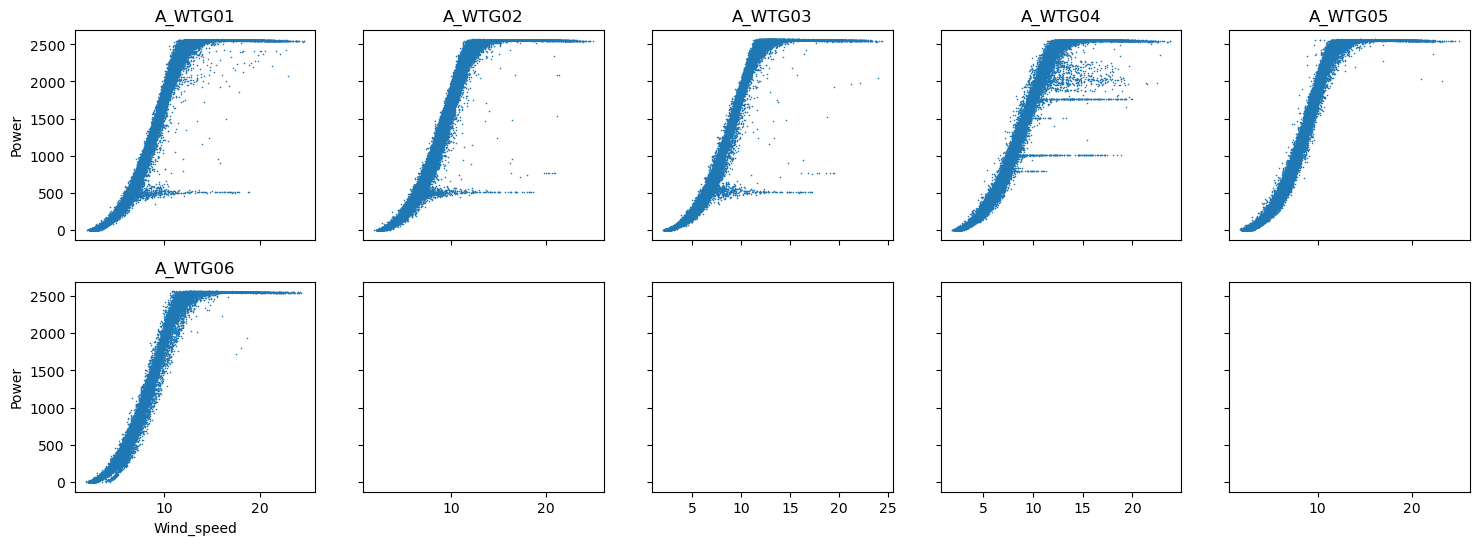

In [94]:
# Plot power curve for each turbine
fig, ax = plt.subplots(2,5, figsize=(18,6), sharex='col', sharey='row');

i = 0
for r in range (2):
        for c in range (5):
            data_turbine = data_clean[data_clean['instanceID'] == turbine_name[i]]
            sns.scatterplot(x = data_turbine['Wind_speed'], y = data_turbine['Power'], ax = ax[r][c], s = 1, edgecolor = None)
            ax[r][c].set_title(turbine_name[i])
            ax[r][c].set_xlabel("Wind_speed") 
            ax[r][c].set_ylabel("Power") 
            i += 1 
            if i >= turbine_count:
                break
plt.show()

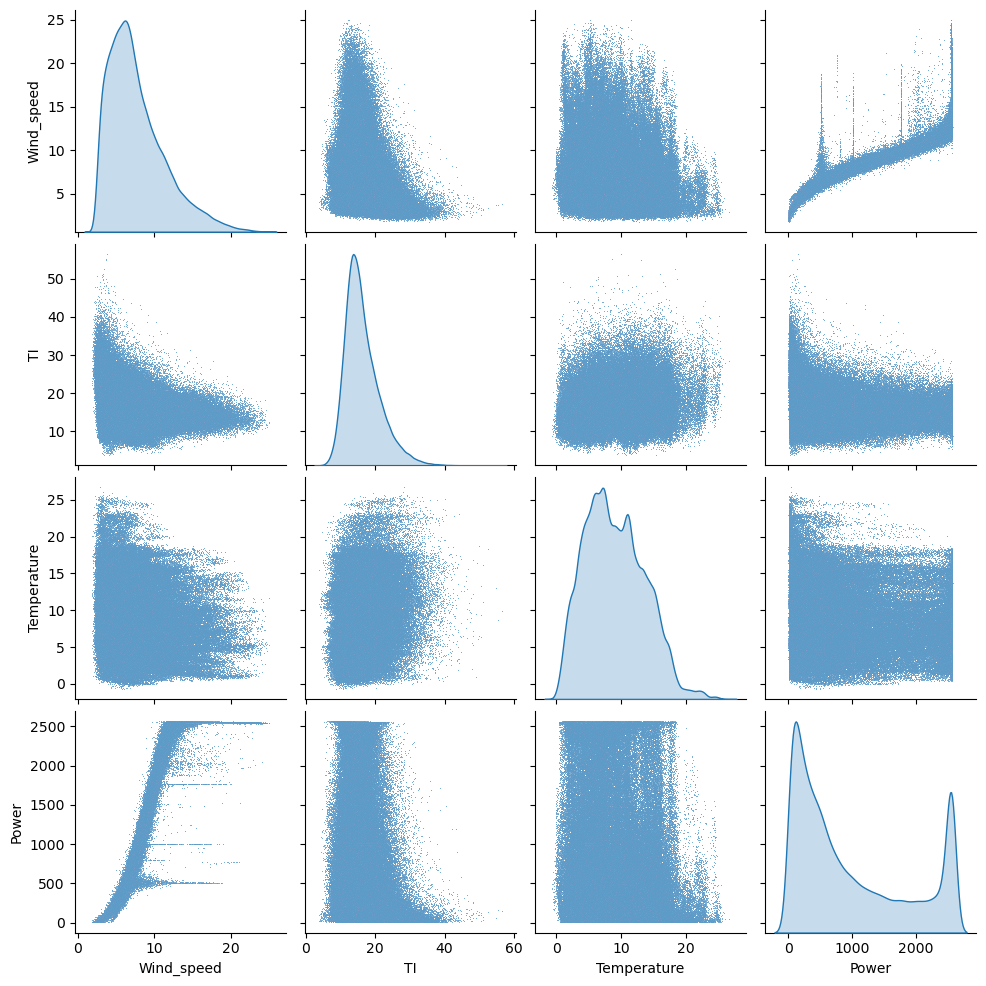

In [95]:
# Make pairplot
sns.pairplot(data_clean, vars = ["Wind_speed", "TI", "Temperature", "Power"], 
             diag_kind = 'kde', plot_kws={'s' : 0.5})
plt.show()

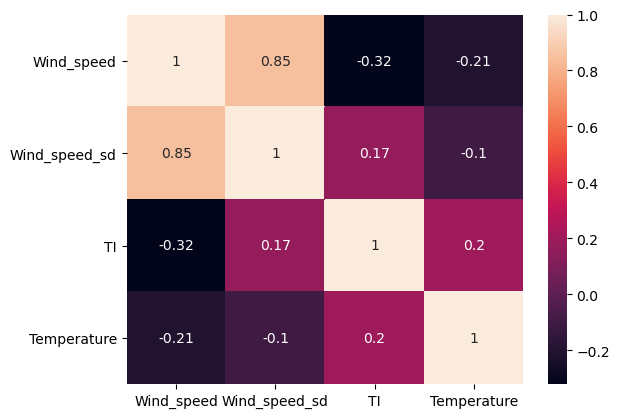

In [96]:
# Plot correlation between features
relation = ['Wind_speed', 'Wind_speed_sd', 'TI', 'Temperature']
sns.heatmap(data_clean[relation].corr(), annot=True)
plt.show()

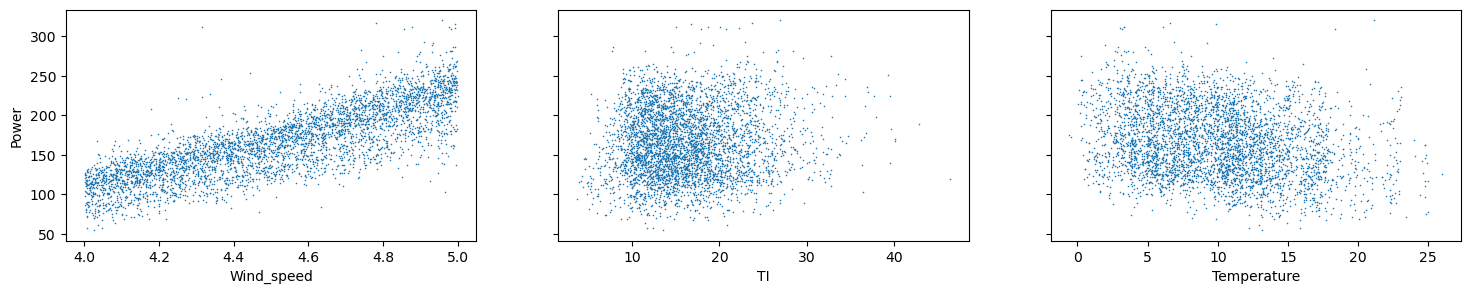

In [110]:
# Make plots for specific wind speed range
data_clean_01 = data_clean[(data_clean['instanceID'] == site + "_WTG01") & (data_clean['Wind_speed'] >= 4) 
                           & (data_clean['Wind_speed'] <= 5)] 

features = ["Wind_speed", "TI", "Temperature"]

fig, ax = plt.subplots(1,3, figsize=(18,3), sharey='row')

for c in range(3):
    sns.scatterplot(x = data_clean_01[features[c]], y = data_clean_01['Power'], ax = ax[c], s = 1, edgecolor = None)
    ax[c].set_xlabel(features[c]) 
    ax[c].set_ylabel("Power") 

plt.show()

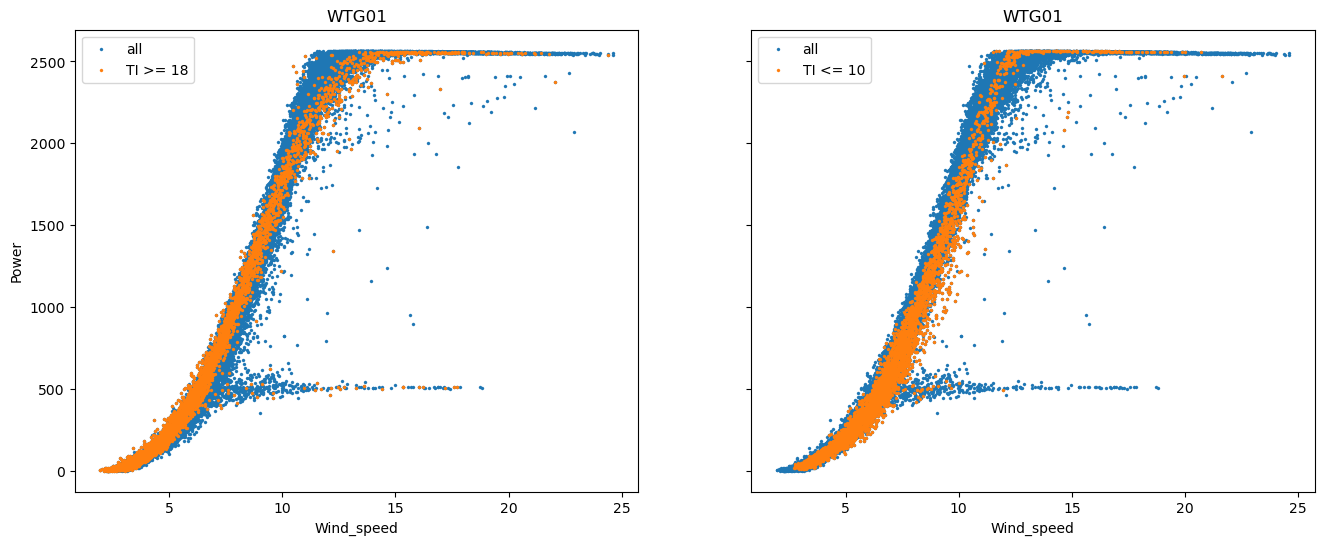

In [102]:
# Plot power curve of difference TI range
WTG01 = data_clean[(data_clean['instanceID'] == site + '_WTG01')]
WTG01_a = WTG01[(WTG01['TI'] >= 18)] 
WTG01_b = WTG01[(WTG01['TI'] <= 10)] 

fig, ax = plt.subplots(1,2, figsize=(16,6), sharey='row')

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[0], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_a['Wind_speed'], y = WTG01_a['Power'], ax = ax[0], s = 5 , label = 'TI >= 18', edgecolor = None)
ax[0].set_xlabel('Wind_speed') 
ax[0].set_ylabel("Power") 
ax[0].set_title("WTG01") 

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[1], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_b['Wind_speed'], y = WTG01_b['Power'], ax = ax[1], s = 5, label = 'TI <= 10', edgecolor = None)
ax[1].set_xlabel('Wind_speed') 
ax[1].set_ylabel("Power") 
ax[1].set_title("WTG01") 

plt.show()

### Export data

In [112]:
# data_clean.to_csv("")